In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [ ]:
x, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [ ]:
x.shape, y.shape

((50000, 15), (50000,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((37500, 15), (12500, 15), (37500,), (12500,))

In [ ]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
clf.fit(X=x_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.14 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.16 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

### Instructions
- Load the datasets(train and test) into the respective arrays
- Initialize the weight_vector and intercept term randomly
- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list
- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )
- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss
- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
def log_loss(y,pred):
    N=len(y)
    total=0
    for i in range(N):
        total=total+(y[i]*(np.log(pred[i]))+((1-y[i])*(np.log(1-pred[i]))))
    return -1*(total/N)

In [ ]:
def dw(x,y,w,b,alpha,N):
    delw=x*(y-sigmoid(np.dot(x,w.T)+b))-(w*0.0001)/N  
    return delw

In [ ]:
def db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    delb=(y-sigmoid(np.dot(x,w.T)+b))
    return delb

In [ ]:
w = np.zeros_like(x_train[0])
b = np.zeros(1)

In [ ]:
print("Train_data log-loss",log_loss(y_train,sigmoid(np.dot(x_train,w.T)+b)))

Train_data log-loss 0.6931471805594285


In [ ]:
print("Test_data log-loss",log_loss(y_test,sigmoid(np.dot(x_test,w.T)+b)))

Test_data log-loss 0.6931471805600672


In [ ]:
def model(x_train,x_test,y_train,y_test,epoch):
    loss_train=[]
    loss_test=[]
    w = np.zeros_like(x_train[0])
    b = np.zeros(1)
    for i in range(epoch): #loop for each epoch
        for j in range(len(x_train)): #for every batch
            gradient_weight=dw(x_train[j,],y_train[j,],w,b,0.0001,len(x_train))
            gradient_bias=db(x_train[j,],y_train[j,],w,b)
            w=w+(0.0001)*gradient_weight
            b=b+(0.0001)*gradient_bias
            
        train_pred=[]
        for j in range(len(x_train)):
            train_pred.append(sigmoid(b+np.dot(x_train[j,],w.T)))
        train_loss=log_loss(y_train,train_pred)
        
        loss_train.append(train_loss)
        
        test_pred=[]
        for j in range(len(x_test)):
            test_pred.append(sigmoid(b+np.dot(x_test[j,],w.T)))
        test_loss=log_loss(y_test,test_pred)
        
        loss_test.append(test_loss)
        
    return loss_train,loss_test,w,b

In [ ]:
train_loss,test_loss,w,b=model(x_train,x_test,y_train,y_test,50)

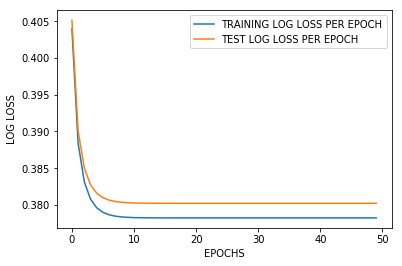

In [ ]:
epoc=list(range(50))
import matplotlib.pyplot as plt
plt.plot(epoc,train_loss,label="TRAINING LOG LOSS PER EPOCH")
plt.plot(epoc,test_loss,label="TEST LOG LOSS PER EPOCH")
plt.xlabel("EPOCHS")
plt.ylabel("LOG LOSS")
plt.legend()
plt.show()

In [ ]:
print("Weight: ",w)

Weight:  [-0.42979243  0.1930352  -0.14846994  0.33809364 -0.22128233  0.56994892
 -0.44518163 -0.08990403  0.2218295   0.17382964  0.19874846 -0.0005843
 -0.08133411  0.3390901   0.02298796]


In [ ]:
print("Bias: ",b)

Bias:  [-0.89225216]


**GOAL: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3**

In [ ]:
w-clf.coef_

array([[-0.00642552,  0.00755955,  0.00012041, -0.00335043, -0.01309563,
         0.00978314,  0.00724319,  0.00418409,  0.0125563 , -0.00701162,
         0.00169655, -0.00480346, -0.00173041,  0.00056208,  0.00032075]])

In [ ]:
b-clf.intercept_

array([-0.03911387])